# <b>Stringent Response Modelling</b> 

In this project, we develop a a set of code to solve a set of differential equations for the modelling a feedback based concentration and rate change of some biomolecules within a bacterial cell.

The chain of reactions are as follows: 
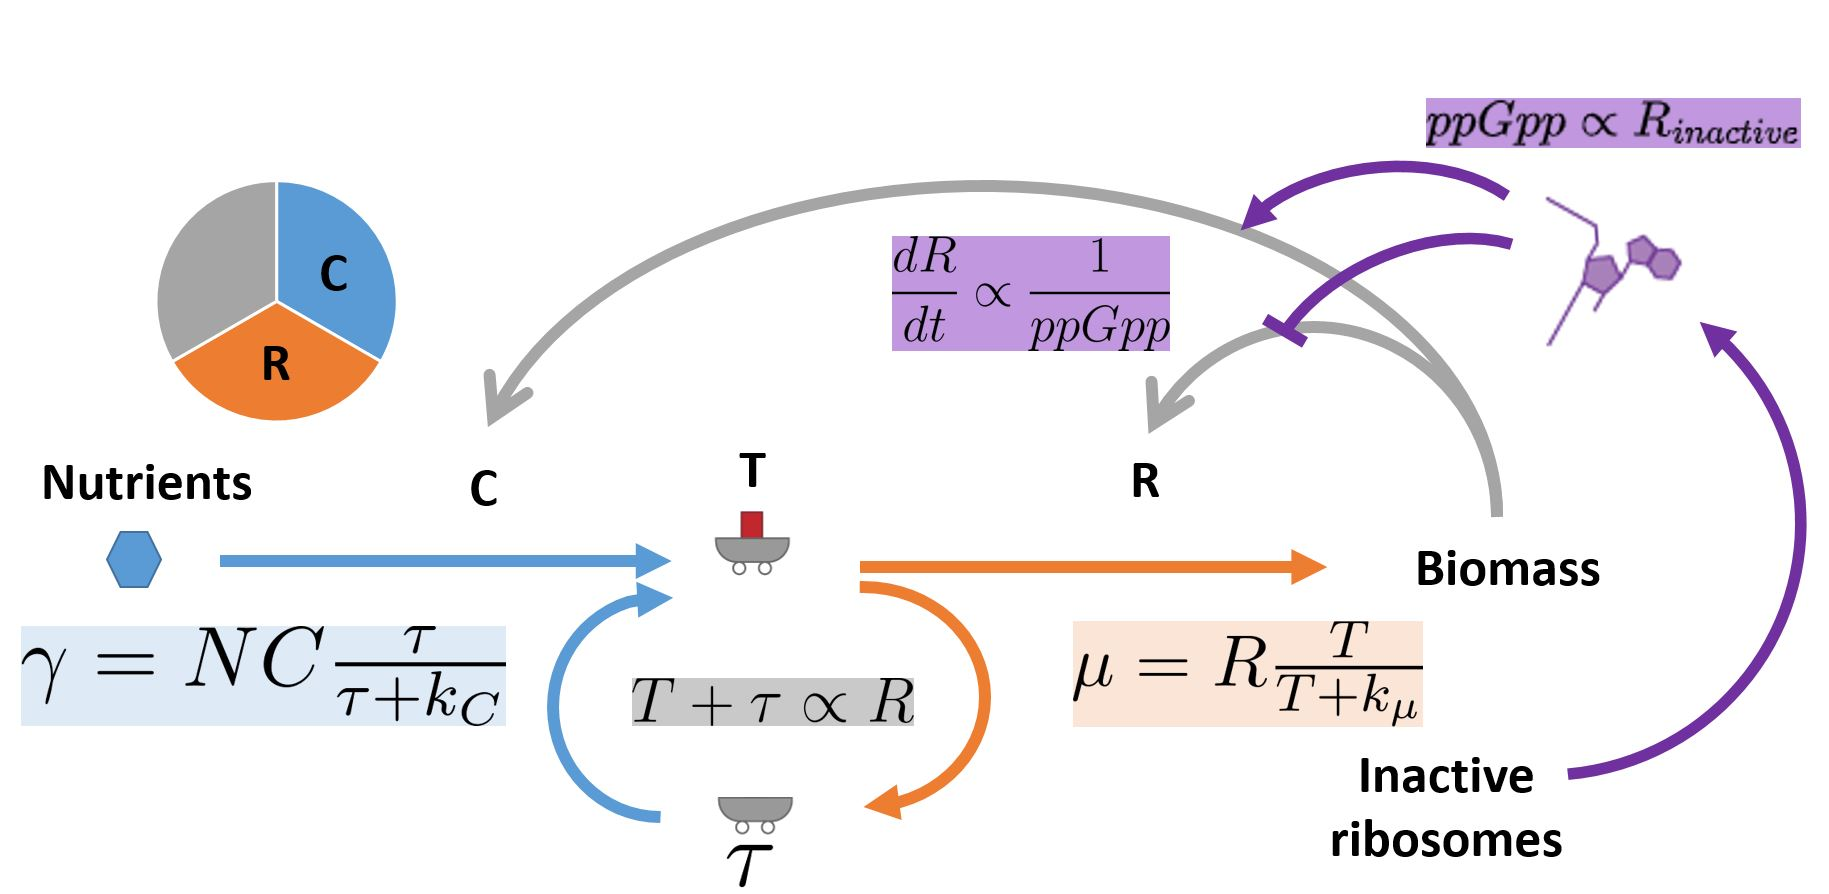

Following are the set of the equations that that we use to model the concentrations and the rates of the reactions.

### <b> The rate equations are:</b>

$$\frac{dT}{dt}=\gamma -\mu -\mu T$$

$$\frac{d\tau }{dt}=\mu -\gamma +\mu \xi R_0 \frac{k_{\Pi\rightarrow R}}{k_{\Pi\rightarrow R}+\Pi} -\mu \tau$$
$$
\frac{dR}{dt}=\mu R_0 \frac{k_{\Pi\rightarrow R}}{k_{\Pi\rightarrow R}+\Pi}-\mu R
$$
$$
\frac{d\Pi}{dt}=\Pi_0 R_{starved}-\delta\Pi
$$

### <b> The rate Constants are:</b>
$$
\gamma=N (R_{max}-R) \frac{\tau}{\tau +k_{\tau \rightarrow \gamma}}
$$

$$
\mu=\mu_{max} R \frac{T}{T+k_{T\rightarrow \mu}}
$$

$$
R_{starved}=\frac{k_{T\rightarrow \mu}}{k_{T\rightarrow \mu}+T}
$$

### <b> The Steady state equations are: </b> 
$$
\gamma =\mu (1+T)
$$

$$
T+\tau=\xi R
$$

$$
R=R_0 \frac{k_{\Pi\rightarrow R}}{k_{\Pi\rightarrow R}+\Pi}
$$

$$
\Pi=\frac{\Pi_0 R_{starved}}{\delta}
$$



 <b>T, R, $\tau$, </b> and <b>$\pi$ </b> are the values that concentrations of biomoleculee that undergo the coupled reactions and $\mu$ and $\gamma$ are the the rate constrants.


## Objective:
 Solve these equations 

After modelling this coupled set of reactions, we present the results of our calculations in the following sections.

In [1]:
import Dynamic_equations as dyneq
import scipy.integrate as spint
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.ticker import (MultipleLocator)

Text(0, 0.5, '$\\mu$')

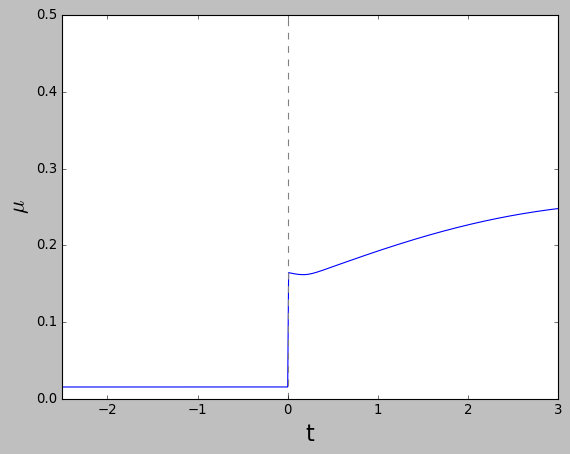

In [58]:
# Starting values to reach steady state before the shift
T_init=0.1
tau_init=0.15
R_init=0.1
Pi_init=100
variables0 = np.array([T_init,tau_init,R_init,Pi_init])
# Starting time to reach steady state before the shift
t_init = -100

# End time
t_end = 3

# Inputs before and after the shift
I = [0.0,0.0]
M = [0.0,0.0]
N = [0.001,0.5]
O = [0.0,0.0]

# Solve dynamical equations for the shift
T,tau,R,Pi,t = dyneq.solveODEshift(t_init,t_end,variables0,I,M,N,O)

# Compute growth rate mu
Iarray = np.ones(len(T))*I[0]
index = np.where(t==0)
Iarray[index[0][0]:] = I[1]
mu = dyneq.growth_rate(T,R,Iarray)

# Plot mu vs. t
plt.plot(t,mu)
plt.xlim(-2.5,3)
plt.ylim(0,0.5)
plt.axvline(x=0,color = 'grey',linestyle='--')
plt.xlabel('t',fontsize = 20)
plt.ylabel(r'$\mu$',fontsize = 20)

Text(0, 0.5, 'R')

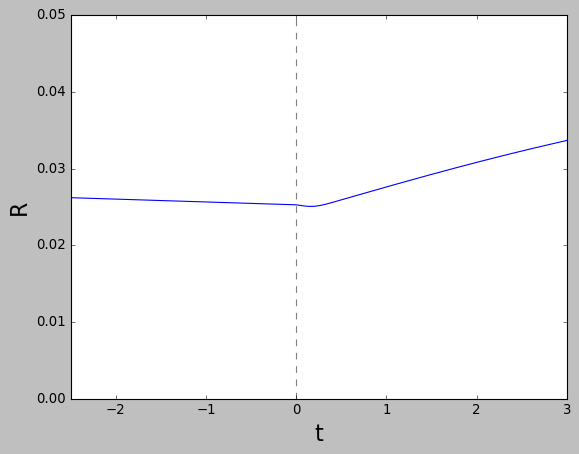

In [62]:
# Plot R vs. t
plt.plot(t,R)
plt.xlim(-2.5,3)
plt.ylim(0,0.05)
plt.axvline(x=0,color = 'grey',linestyle='--')
plt.xlabel('t',fontsize = 20)
plt.ylabel('R',fontsize = 20)

Text(0, 0.5, '$\\mu$')

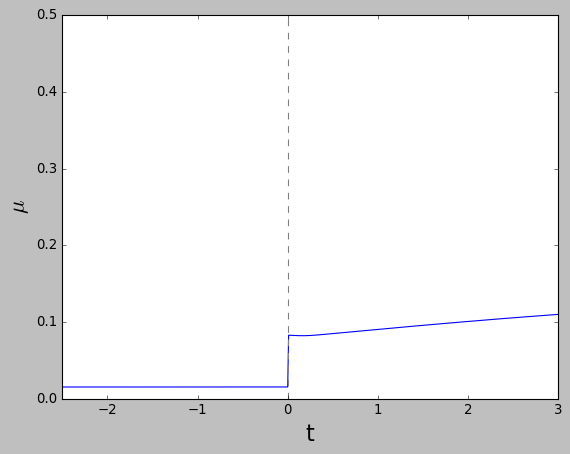

In [59]:
# Inputs before and after the shift
I = [0.5,0.5]
M = [0.0,0.0]
N = [0.001,0.5]
O = [0.0,0.0]

# Solve dynamical equations for the shift
T,tau,R,Pi,t = dyneq.solveODEshift(t_init,t_end,variables0,I,M,N,O)

# Compute growth rate mu (can go in a function)
Iarray = np.ones(len(T))*I[0]
index = np.where(t==0)
Iarray[index[0][0]:] = I[1]
mu = dyneq.growth_rate(T,R,Iarray)

# Plot mu vs. t
plt.plot(t,mu)
plt.xlim(-2.5,3)
plt.ylim(0,0.5)
plt.axvline(x=0,color = 'grey',linestyle='--')
plt.xlabel('t',fontsize = 20)
plt.ylabel(r'$\mu$',fontsize = 20)